# Core Tasks

In [1]:
import pandas as pd
import numpy as np

In [2]:
tags= pd.read_csv('tags_output2.csv')

In [3]:
movie_rat= pd.read_csv('movie_rating.csv')

In [4]:
movie_rat['rating']= movie_rat['rating'].round(2)

In [5]:
tags= tags.merge(movie_rat, how='left', on='movieId')

In [6]:
tags= tags[['userId', 'movieId','rating', 'n_of_ratings', 'tag', 'tag_tokens', 'tag_nsw', 'tag_lemm',
       'tag_pos_tags']]

In [7]:
tags['rating_class'] = (tags['rating']).round()

In [8]:
tags['rating_class'].value_counts()

4.0    2769
3.0     748
2.0      94
5.0      45
0.0      24
1.0       3
Name: rating_class, dtype: int64

In [9]:
tags['rating_class']=tags['rating_class'].astype(int)

In [10]:
ratings=tags['rating_class']

In [11]:
tags.sample(5)

,userId,movieId,rating,n_of_ratings,tag,tag_tokens,tag_nsw,tag_lemm,tag_pos_tags,rating_class
246,62,88405,3.05,20,sex,['sex'],['sex'],['sex'],"[('sex', 'NN')]",3
2928,567,1916,3.42,12,wry,['wry'],['wri'],['wry'],"[('wry', 'NN')]",3
89,62,6058,3.05,10,sequel,['sequel'],['sequel'],['sequel'],"[('sequel', 'NN')]",3
2464,474,37240,3.50,4,in netflix queue,"['in', 'netflix', 'queue']","['netflix', 'queue']","['in', 'netflix', 'queue']","[('in', 'IN'), ('netflix', 'JJ'), ('queue', 'N...",4
3414,599,296,4.20,307,conversation,['conversation'],['convers'],['conversation'],"[('conversation', 'NN')]",4


Word2vec


In [12]:
!pip install mord

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [14]:
train_tags, test_tags, train_ratings, test_ratings = train_test_split(
    tags['tag_nsw'], ratings, test_size=0.2, random_state=42
)

train_class_distribution = train_ratings.value_counts(normalize=True)
print("Training Set Class Distribution:\n", train_class_distribution)

test_class_distribution = test_ratings.value_counts(normalize=True)
print("Testing Set Class Distribution:\n", test_class_distribution)

Training Set Class Distribution:
 4    0.754582
3    0.200950
2    0.025458
5    0.011541
0    0.006449
1    0.001018
Name: rating_class, dtype: float64
Testing Set Class Distribution:
 4    0.740841
3    0.211669
2    0.025780
5    0.014925
0    0.006784
Name: rating_class, dtype: float64


# Text Classification

Ordinal Classification

In [15]:

df=tags
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from mord import OrdinalRidge
from sklearn.metrics import accuracy_score

vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(train_tags)
X_test_tfidf = vectorizer.transform(test_tags)

model = OrdinalRidge()

model.fit(X_train_tfidf, train_ratings)

predictions = model.predict(X_test_tfidf)

accuracy = accuracy_score(test_ratings, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7191316146540027


In [16]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(test_ratings, predictions)

print("Confusion Matrix:")
print(cm)

report = classification_report(test_ratings, predictions)
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[  0   0   0   5   0]
 [  0   0   3  16   0]
 [  0   0  34 122   0]
 [  0   0  50 496   0]
 [  0   0   0  11   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        19
           3       0.39      0.22      0.28       156
           4       0.76      0.91      0.83       546
           5       0.00      0.00      0.00        11

    accuracy                           0.72       737
   macro avg       0.23      0.23      0.22       737
weighted avg       0.65      0.72      0.67       737



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## CLUSTERING

In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

text_data = df['tag_nsw']

vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(text_data)

num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_tfidf)

df['cluster'] = kmeans.labels_

print(df[['tag_nsw', 'cluster']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                    tag_nsw  cluster
0                 ['funni']        3
1     ['highli', 'quotabl']        3
2                ['ferrel']        3
3          ['box', 'stori']        3
4                   ['mma']        3
...                     ...      ...
3678               ['kati']        3
3679             ['auster']        3
3680          ['gun', 'fu']        3
3681  ['heroic', 'bloodsh']        3
3682  ['heroic', 'bloodsh']        3

[3683 rows x 2 columns]


In [18]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_tfidf, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.0883444633901524


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

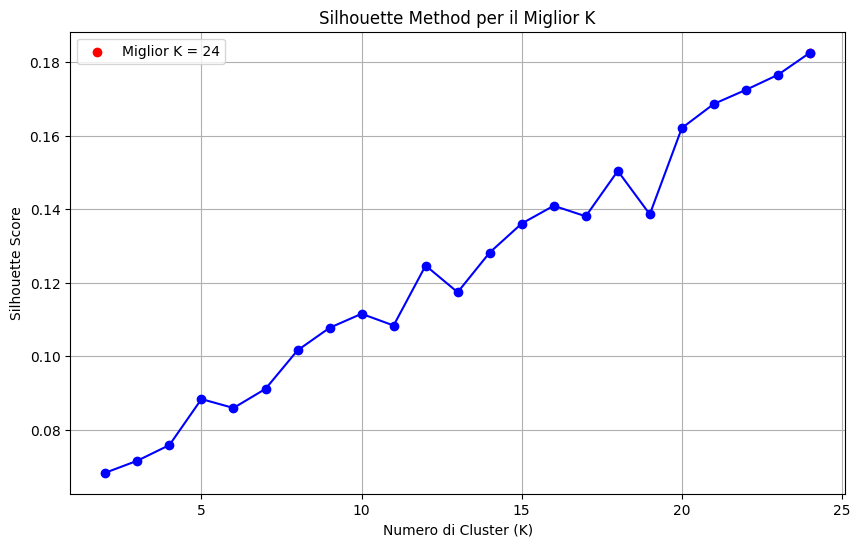

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score

text_data = df['tag_nsw']

vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(text_data)

silhouette_scores = []
for k in range(2,25):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_tfidf)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_tfidf, labels)
    silhouette_scores.append(silhouette_avg)

best_k = np.argmax(silhouette_scores) + 2


plt.figure(figsize=(10, 6))
plt.plot(range(2,25), silhouette_scores, marker='o', linestyle='-', color='b')
plt.scatter(best_k, silhouette_scores[best_k - 2], c='red', marker='o', label=f'Miglior K = {best_k}')
plt.xlabel('Numero di Cluster (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method per il Miglior K')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

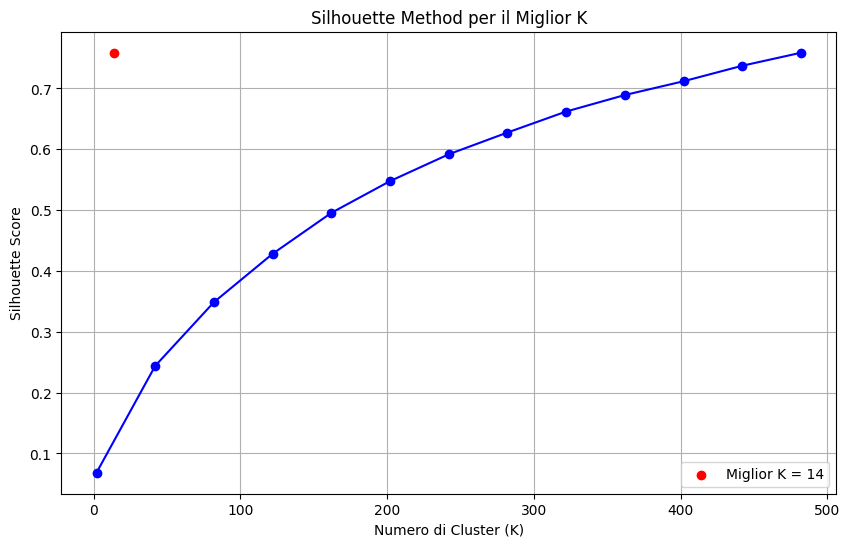

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score

text_data = df['tag_nsw']

vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(text_data)

silhouette_scores = []
for k in range(2,500,40):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_tfidf)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_tfidf, labels)
    silhouette_scores.append(silhouette_avg)

best_k = np.argmax(silhouette_scores) + 2


plt.figure(figsize=(10, 6))
plt.plot(range(2,500,40), silhouette_scores, marker='o', linestyle='-', color='b')
plt.scatter(best_k, silhouette_scores[best_k - 2], c='red', marker='o', label=f'Miglior K = {best_k}')
plt.xlabel('Numero di Cluster (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method per il Miglior K')
plt.legend()
plt.grid(True)
plt.show()


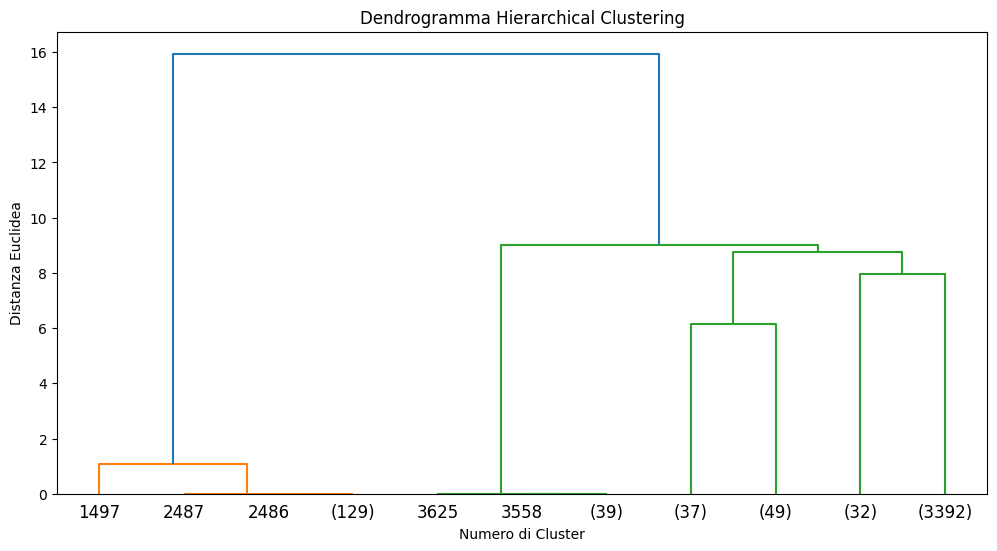

In [21]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linkage_matrix = linkage(X_tfidf.toarray(), method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.title('Dendrogramma Hierarchical Clustering')
plt.xlabel('Numero di Cluster')
plt.ylabel('Distanza Euclidea')
plt.show()


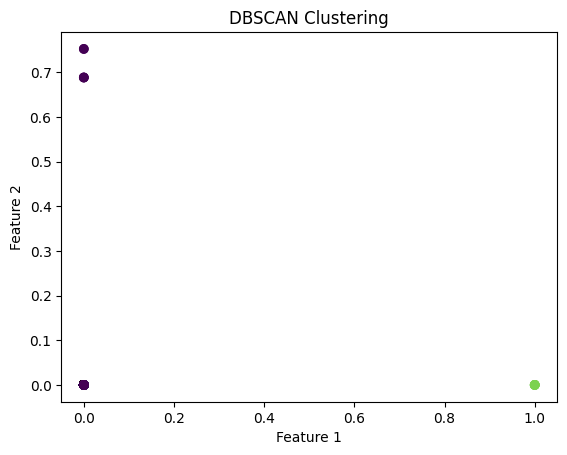

In [22]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_tfidf)

plt.scatter(X_tfidf.toarray()[:, 0], X_tfidf.toarray()[:, 1], c=labels_dbscan, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


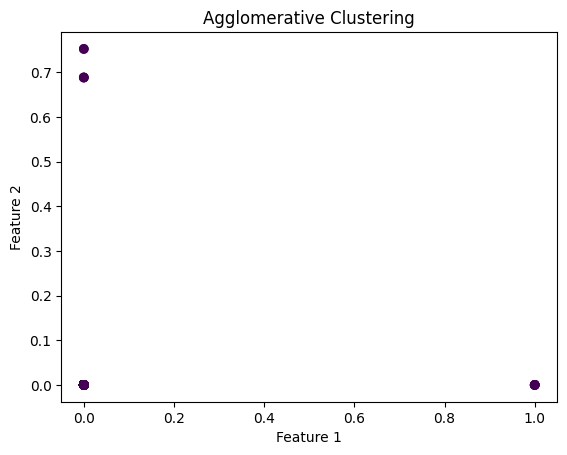

In [23]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=5)
labels_agg = agg_clustering.fit_predict(X_tfidf.toarray())

plt.scatter(X_tfidf.toarray()[:, 0], X_tfidf.toarray()[:, 1], c=labels_agg, cmap='viridis', marker='o')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [24]:
df

,userId,movieId,rating,n_of_ratings,tag,tag_tokens,tag_nsw,tag_lemm,tag_pos_tags,rating_class,cluster
0,2,60756,3.55,28,funny,['funny'],['funni'],['funny'],"[('funny', 'NN')]",4,3
1,2,60756,3.55,28,highly quotable,"['highly', 'quotable']","['highli', 'quotabl']","['highly', 'quotable']","[('highly', 'RB'), ('quotable', 'JJ')]",4,3
2,2,60756,3.55,28,will ferrell,"['will', 'ferrell']",['ferrel'],"['will', 'ferrell']","[('will', 'MD'), ('ferrell', 'VB')]",4,3
3,2,89774,3.73,11,boxing story,"['boxing', 'story']","['box', 'stori']","['boxing', 'story']","[('boxing', 'VBG'), ('story', 'NN')]",4,3
4,2,89774,3.73,11,mma,['mma'],['mma'],['mma'],"[('mma', 'NN')]",4,3
...,...,...,...,...,...,...,...,...,...,...,...
3678,606,7382,4.25,2,for katie,"['for', 'katie']",['kati'],"['for', 'katie']","[('for', 'IN'), ('katie', 'NN')]",4,3
3679,606,7936,4.00,1,austere,['austere'],['auster'],['austere'],"[('austere', 'RB')]",4,3
3680,610,3265,4.00,9,gun fu,"['gun', 'fu']","['gun', 'fu']","['gun', 'fu']","[('gun', 'NN'), ('fu', 'NN')]",4,3
3681,610,3265,4.00,9,heroic bloodshed,"['heroic', 'bloodshed']","['heroic', 'bloodsh']","['heroic', 'bloodshed']","[('heroic', 'NN'), ('bloodshed', 'VBD')]",4,3


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn import metrics

def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    purity = np.sum(np.max(contingency_matrix, axis=0)) / np.sum(contingency_matrix)
    return purity

text_data = df['tag_nsw']

vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(text_data)

num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels_kmeans = kmeans.fit_predict(X_tfidf)

linkage_matrix = linkage(X_tfidf.toarray(), method='ward')
labels_hierarchy = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward').fit_predict(X_tfidf.toarray())

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_tfidf)

agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
labels_agg = agg_clustering.fit_predict(X_tfidf.toarray())

algorithms = ['K-Means', 'Hierarchical', 'DBSCAN', 'Agglomerative']
labels = [labels_kmeans, labels_hierarchy, labels_dbscan, labels_agg]

for i, algorithm in enumerate(algorithms):
    silhouette = metrics.silhouette_score(X_tfidf, labels[i])
    purity = purity_score(df['rating_class'], labels[i])
    rand_index = metrics.adjusted_rand_score(df['rating_class'], labels[i])

    contingency_matrix = metrics.cluster.contingency_matrix(df['rating_class'], labels[i])
    precision = np.sum(np.max(contingency_matrix, axis=0)) / np.sum(contingency_matrix)
    recall = np.sum(np.max(contingency_matrix, axis=1)) / np.sum(contingency_matrix)
    f_measure = (2 * precision * recall) / (precision + recall)

    print(f"Metrics for {algorithm}:")
    print(f"Silhouette Score: {silhouette}")
    print(f"Purity: {purity}")
    print(f"Rand Index: {rand_index}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F-measure: {f_measure}")
    print("-----------------------")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Metrics for K-Means:
Silhouette Score: 0.0883444633901524
Purity: 0.7523757806136302
Rand Index: 0.0013352341703954246
Precision: 0.7523757806136302
Recall: 0.9397230518598968
F-measure: 0.8356779771193112
-----------------------
Metrics for Hierarchical:
Silhouette Score: 0.09482775930678364
Purity: 0.7518327450448005
Rand Index: -0.01445675420772261
Precision: 0.7518327450448005
Recall: 0.9212598425196851
F-measure: 0.8279677065683246
-----------------------
Metrics for DBSCAN:
Silhouette Score: 0.49750143516472434
Purity: 0.7637795275590551
Rand Index: -0.011912994537384114
Precision: 0.7637795275590551
Recall: 0.38528373608471356
F-measure: 0.5121943051069467
-----------------------
Metrics for Agglomerative:
Silhouette Score: 0.09482775930678364
Purity: 0.7518327450448005
Rand Index: -0.01445675420772261
Precision: 0.7518327450448005
Recall: 0.9212598425196851
F-measure: 0.8279677065683246
-----------------------


In [26]:
#!pip install tabulate


In [27]:
from tabulate import tabulate

data = [
    ["K-Means", 0.0875, 0.7518, 0.0039, 0.7518, 0.9530, 0.8406],
    ["Hierarchical", 0.1011, 0.7518, -0.0052, 0.7518, 0.9259, 0.8298],
    ["DBSCAN", 0.4975, 0.7641, -0.0113, 0.7641, 0.3864, 0.5132],
    ["Agglomerative", 0.1011, 0.7518, -0.0052, 0.7518, 0.9259, 0.8298]
]

columns = ["Algorithm", "Silhouette Score", "Purity", "Rand Index", "Precision", "Recall", "F-measure"]

table = tabulate(data, headers=columns, tablefmt="pretty")

print(table)


+---------------+------------------+--------+------------+-----------+--------+-----------+
|   Algorithm   | Silhouette Score | Purity | Rand Index | Precision | Recall | F-measure |
+---------------+------------------+--------+------------+-----------+--------+-----------+
|    K-Means    |      0.0875      | 0.7518 |   0.0039   |  0.7518   | 0.953  |  0.8406   |
| Hierarchical  |      0.1011      | 0.7518 |  -0.0052   |  0.7518   | 0.9259 |  0.8298   |
|    DBSCAN     |      0.4975      | 0.7641 |  -0.0113   |  0.7641   | 0.3864 |  0.5132   |
| Agglomerative |      0.1011      | 0.7518 |  -0.0052   |  0.7518   | 0.9259 |  0.8298   |
+---------------+------------------+--------+------------+-----------+--------+-----------+


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import linkage
from sklearn import metrics
from tabulate import tabulate

def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    purity = np.sum(np.max(contingency_matrix, axis=0)) / np.sum(contingency_matrix)
    return purity

text_data = df['tag_nsw']

vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(text_data)

num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels_kmeans = kmeans.fit_predict(X_tfidf)

linkage_matrix = linkage(X_tfidf.toarray(), method='ward')
labels_hierarchy = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward').fit_predict(X_tfidf.toarray())

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_tfidf)

agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
labels_agg = agg_clustering.fit_predict(X_tfidf.toarray())

algorithms = ['K-Means', 'Hierarchical', 'DBSCAN', 'Agglomerative']
labels = [labels_kmeans, labels_hierarchy, labels_dbscan, labels_agg]

table_data = []
for i, algorithm in enumerate(algorithms):
    silhouette = round(metrics.silhouette_score(X_tfidf, labels[i]), 3)
    purity = round(purity_score(df['rating_class'], labels[i]), 3)  # Usiamo la nostra funzione di purezza
    rand_index = round(metrics.adjusted_rand_score(df['rating_class'], labels[i]), 3)

    contingency_matrix = metrics.cluster.contingency_matrix(df['rating_class'], labels[i])
    precision = round(np.sum(np.max(contingency_matrix, axis=0)) / np.sum(contingency_matrix), 3)
    recall = round(np.sum(np.max(contingency_matrix, axis=1)) / np.sum(contingency_matrix), 3)
    f_measure = round((2 * precision * recall) / (precision + recall), 3)

    table_data.append([algorithm, silhouette, purity, rand_index, precision, recall, f_measure])

columns = ["Algorithm", "Silhouette Score", "Purity", "Rand Index", "Precision", "Recall", "F-measure"]

table = tabulate(table_data, headers=columns, tablefmt="pretty")

print(table)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


+---------------+------------------+--------+------------+-----------+--------+-----------+
|   Algorithm   | Silhouette Score | Purity | Rand Index | Precision | Recall | F-measure |
+---------------+------------------+--------+------------+-----------+--------+-----------+
|    K-Means    |      0.088       | 0.752  |   0.001    |   0.752   |  0.94  |   0.836   |
| Hierarchical  |      0.095       | 0.752  |   -0.014   |   0.752   | 0.921  |   0.828   |
|    DBSCAN     |      0.498       | 0.764  |   -0.012   |   0.764   | 0.385  |   0.512   |
| Agglomerative |      0.095       | 0.752  |   -0.014   |   0.752   | 0.921  |   0.828   |
+---------------+------------------+--------+------------+-----------+--------+-----------+


##  Try with different values of k

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import linkage
from sklearn import metrics
from tabulate import tabulate

def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    purity = np.sum(np.max(contingency_matrix, axis=0)) / np.sum(contingency_matrix)
    return purity

text_data = df['tag_nsw']

vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(text_data)

num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels_kmeans = kmeans.fit_predict(X_tfidf)

linkage_matrix = linkage(X_tfidf.toarray(), method='ward')
labels_hierarchy = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward').fit_predict(X_tfidf.toarray())

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_tfidf)

agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
labels_agg = agg_clustering.fit_predict(X_tfidf.toarray())

algorithms = ['K-Means', 'Hierarchical', 'DBSCAN', 'Agglomerative']
labels = [labels_kmeans, labels_hierarchy, labels_dbscan, labels_agg]

table_data = []
for i, algorithm in enumerate(algorithms):
    silhouette = round(metrics.silhouette_score(X_tfidf, labels[i]), 3)
    purity = round(purity_score(df['rating_class'], labels[i]), 3)  #Usiamo la nostra funzione di purezza
    rand_index = round(metrics.adjusted_rand_score(df['rating_class'], labels[i]), 3)

    contingency_matrix = metrics.cluster.contingency_matrix(df['rating_class'], labels[i])
    precision = round(np.sum(np.max(contingency_matrix, axis=0)) / np.sum(contingency_matrix), 3)
    recall = round(np.sum(np.max(contingency_matrix, axis=1)) / np.sum(contingency_matrix), 3)
    f_measure = round((2 * precision * recall) / (precision + recall), 3)

    table_data.append([algorithm, silhouette, purity, rand_index, precision, recall, f_measure])

columns = ["Algorithm", "Silhouette Score", "Purity", "Rand Index", "Precision", "Recall", "F-measure"]

table = tabulate(table_data, headers=columns, tablefmt="pretty")

print(table)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


+---------------+------------------+--------+------------+-----------+--------+-----------+
|   Algorithm   | Silhouette Score | Purity | Rand Index | Precision | Recall | F-measure |
+---------------+------------------+--------+------------+-----------+--------+-----------+
|    K-Means    |      0.072       | 0.752  |   0.006    |   0.752   | 0.961  |   0.844   |
| Hierarchical  |      0.079       | 0.752  |   -0.001   |   0.752   | 0.953  |   0.841   |
|    DBSCAN     |      0.498       | 0.764  |   -0.012   |   0.764   | 0.385  |   0.512   |
| Agglomerative |      0.079       | 0.752  |   -0.001   |   0.752   | 0.953  |   0.841   |
+---------------+------------------+--------+------------+-----------+--------+-----------+


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import linkage
from sklearn import metrics
from tabulate import tabulate

def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    purity = np.sum(np.max(contingency_matrix, axis=0)) / np.sum(contingency_matrix)
    return purity

text_data = df['tag_nsw']

vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(text_data)

num_clusters = 8

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels_kmeans = kmeans.fit_predict(X_tfidf)

linkage_matrix = linkage(X_tfidf.toarray(), method='ward')
labels_hierarchy = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward').fit_predict(X_tfidf.toarray())

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_tfidf)

agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
labels_agg = agg_clustering.fit_predict(X_tfidf.toarray())

algorithms = ['K-Means', 'Hierarchical', 'DBSCAN', 'Agglomerative']
labels = [labels_kmeans, labels_hierarchy, labels_dbscan, labels_agg]

table_data = []
for i, algorithm in enumerate(algorithms):
    silhouette = round(metrics.silhouette_score(X_tfidf, labels[i]), 3)
    purity = round(purity_score(df['rating_class'], labels[i]), 3)  # Usiamo la nostra funzione di purezza
    rand_index = round(metrics.adjusted_rand_score(df['rating_class'], labels[i]), 3)

    contingency_matrix = metrics.cluster.contingency_matrix(df['rating_class'], labels[i])
    precision = round(np.sum(np.max(contingency_matrix, axis=0)) / np.sum(contingency_matrix), 3)
    recall = round(np.sum(np.max(contingency_matrix, axis=1)) / np.sum(contingency_matrix), 3)
    f_measure = round((2 * precision * recall) / (precision + recall), 3)

    table_data.append([algorithm, silhouette, purity, rand_index, precision, recall, f_measure])

columns = ["Algorithm", "Silhouette Score", "Purity", "Rand Index", "Precision", "Recall", "F-measure"]

table = tabulate(table_data, headers=columns, tablefmt="pretty")

print(table)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


+---------------+------------------+--------+------------+-----------+--------+-----------+
|   Algorithm   | Silhouette Score | Purity | Rand Index | Precision | Recall | F-measure |
+---------------+------------------+--------+------------+-----------+--------+-----------+
|    K-Means    |      0.102       | 0.753  |   0.007    |   0.753   | 0.918  |   0.827   |
| Hierarchical  |      0.114       | 0.752  |   -0.029   |   0.752   | 0.897  |   0.818   |
|    DBSCAN     |      0.498       | 0.764  |   -0.012   |   0.764   | 0.385  |   0.512   |
| Agglomerative |      0.114       | 0.752  |   -0.029   |   0.752   | 0.897  |   0.818   |
+---------------+------------------+--------+------------+-----------+--------+-----------+


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import linkage
from sklearn import metrics
from tabulate import tabulate

def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    purity = np.sum(np.max(contingency_matrix, axis=0)) / np.sum(contingency_matrix)
    return purity

text_data = df['tag_nsw']

vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(text_data)

num_clusters = 11

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels_kmeans = kmeans.fit_predict(X_tfidf)

linkage_matrix = linkage(X_tfidf.toarray(), method='ward')
labels_hierarchy = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward').fit_predict(X_tfidf.toarray())

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_tfidf)

agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
labels_agg = agg_clustering.fit_predict(X_tfidf.toarray())

algorithms = ['K-Means', 'Hierarchical', 'DBSCAN', 'Agglomerative']
labels = [labels_kmeans, labels_hierarchy, labels_dbscan, labels_agg]

table_data = []
for i, algorithm in enumerate(algorithms):
    silhouette = round(metrics.silhouette_score(X_tfidf, labels[i]), 3)
    purity = round(purity_score(df['rating_class'], labels[i]), 3)  # Usiamo la nostra funzione di purezza
    rand_index = round(metrics.adjusted_rand_score(df['rating_class'], labels[i]), 3)

    contingency_matrix = metrics.cluster.contingency_matrix(df['rating_class'], labels[i])
    precision = round(np.sum(np.max(contingency_matrix, axis=0)) / np.sum(contingency_matrix), 3)
    recall = round(np.sum(np.max(contingency_matrix, axis=1)) / np.sum(contingency_matrix), 3)
    f_measure = round((2 * precision * recall) / (precision + recall), 3)

    table_data.append([algorithm, silhouette, purity, rand_index, precision, recall, f_measure])

columns = ["Algorithm", "Silhouette Score", "Purity", "Rand Index", "Precision", "Recall", "F-measure"]

table = tabulate(table_data, headers=columns, tablefmt="pretty")

print(table)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


+---------------+------------------+--------+------------+-----------+--------+-----------+
|   Algorithm   | Silhouette Score | Purity | Rand Index | Precision | Recall | F-measure |
+---------------+------------------+--------+------------+-----------+--------+-----------+
|    K-Means    |      0.108       | 0.753  |   -0.005   |   0.753   | 0.898  |   0.819   |
| Hierarchical  |      0.134       | 0.752  |   -0.026   |   0.752   | 0.877  |   0.81    |
|    DBSCAN     |      0.498       | 0.764  |   -0.012   |   0.764   | 0.385  |   0.512   |
| Agglomerative |      0.134       | 0.752  |   -0.026   |   0.752   | 0.877  |   0.81    |
+---------------+------------------+--------+------------+-----------+--------+-----------+


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import linkage
from sklearn import metrics
from tabulate import tabulate

def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    purity = np.sum(np.max(contingency_matrix, axis=0)) / np.sum(contingency_matrix)
    return purity

text_data = df['tag_nsw']

vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(text_data)

num_clusters = 14

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels_kmeans = kmeans.fit_predict(X_tfidf)

linkage_matrix = linkage(X_tfidf.toarray(), method='ward')
labels_hierarchy = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward').fit_predict(X_tfidf.toarray())

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_tfidf)

agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
labels_agg = agg_clustering.fit_predict(X_tfidf.toarray())

algorithms = ['K-Means', 'Hierarchical', 'DBSCAN', 'Agglomerative']
labels = [labels_kmeans, labels_hierarchy, labels_dbscan, labels_agg]

table_data = []
for i, algorithm in enumerate(algorithms):
    silhouette = round(metrics.silhouette_score(X_tfidf, labels[i]), 3)
    purity = round(purity_score(df['rating_class'], labels[i]), 3)  # Usiamo la nostra funzione di purezza
    rand_index = round(metrics.adjusted_rand_score(df['rating_class'], labels[i]), 3)

    contingency_matrix = metrics.cluster.contingency_matrix(df['rating_class'], labels[i])
    precision = round(np.sum(np.max(contingency_matrix, axis=0)) / np.sum(contingency_matrix), 3)
    recall = round(np.sum(np.max(contingency_matrix, axis=1)) / np.sum(contingency_matrix), 3)
    f_measure = round((2 * precision * recall) / (precision + recall), 3)

    table_data.append([algorithm, silhouette, purity, rand_index, precision, recall, f_measure])

columns = ["Algorithm", "Silhouette Score", "Purity", "Rand Index", "Precision", "Recall", "F-measure"]

table = tabulate(table_data, headers=columns, tablefmt="pretty")

print(table)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


+---------------+------------------+--------+------------+-----------+--------+-----------+
|   Algorithm   | Silhouette Score | Purity | Rand Index | Precision | Recall | F-measure |
+---------------+------------------+--------+------------+-----------+--------+-----------+
|    K-Means    |      0.128       | 0.752  |   -0.041   |   0.752   |  0.88  |   0.811   |
| Hierarchical  |      0.152       | 0.752  |   -0.023   |   0.752   | 0.858  |   0.802   |
|    DBSCAN     |      0.498       | 0.764  |   -0.012   |   0.764   | 0.385  |   0.512   |
| Agglomerative |      0.152       | 0.752  |   -0.023   |   0.752   | 0.858  |   0.802   |
+---------------+------------------+--------+------------+-----------+--------+-----------+
